# 解析 Capital HarnessXC 导出的 DXF 文件



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dxfgrabber
import ezdxf

%matplotlib inline

## 学习解析 AutoCAD 导出的 DXF 文件

### 解析只有一条直线的 AutoCAD 图纸

In [70]:
autocad = dxfgrabber.readfile("./single-Line.dxf")

In [91]:
entities = autocad.entities.get_entities()
entities

In [92]:
line = entities[0]
print(dir(line))
# dxftype, start, end, color, thickness, extrusion

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'color', 'dxftype', 'end', 'extrusion', 'handle', 'invisible', 'layer', 'layout_tab_name', 'line_weight', 'linetype', 'ltscale', 'owner', 'paperspace', 'set_default_extrusion', 'setup_attributes', 'shadow_mode', 'start', 'thickness', 'transparency', 'true_color']


In [88]:
print(line.start, line.end)

(0.0, 0.0, 0.0) (0.018040877410335, 9.999983726323872, 0.0)


### 解析有直线和曲线的 AutoCAD 图纸

In [141]:
linecurve = dxfgrabber.readfile('./line_curve_segments.dxf')

In [142]:
entities = linecurve.entities.get_entities()
entities

(-1.3701120309204589,
 5.3033250474818283,
 -0.50090899073758055,
 10.51908880548919)

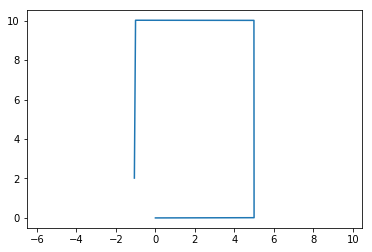

In [147]:
pts = entities[0].points
x = [i[0] for i in pts]
y = [i[1] for i in pts]
plt.plot(x, y)
plt.axis('equal')

Linecurve 的 dxf 问价在 AutoCAD 中打开是下图的样子：

![line_curve](images/line_curve.png)

所以，目前的 LWPolyline 中并没有 curve 的数据点。这个问题需要进一步分析解决。

我用文本编辑器打开这个 dxf 文件，使用 `polyline` 搜索，有四个元素，两个 `LWPOLYLINE` 两个 `AcDbPolyline`，感觉应该是刚好对应上图中的**两条线段和两条半圆弧**。下面我在 Drawing 对象中查找这个 `AcDbEntity` 以及 `AcDbPolyline`.

In [149]:
print(dir(linecurve))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'acdsdata', 'assure_3d_coords', 'blocks', 'collect_sab_data', 'dxfversion', 'encoding', 'entities', 'filename', 'grab_blocks', 'header', 'layers', 'linetypes', 'modelspace', 'objects', 'paperspace', 'resolve_text_styles', 'styles']


In [154]:
# dir(linecurve.blocks)
linecurve.blocks._blocks

{'*Model_Space': <dxfgrabber.dxfentities.Block at 0x10ba51080>,
 '*Paper_Space': <dxfgrabber.dxfentities.Block at 0x10ba51048>,
 '*Paper_Space0': <dxfgrabber.dxfentities.Block at 0x10758bac8>,
 'A$C66E75886': <dxfgrabber.dxfentities.Block at 0x10ba51160>}

In [167]:
# dir(linecurve.entities)
polyline = linecurve.entities._entities[0]

In [170]:
print(dir(polyline))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'bulge', 'color', 'const_width', 'dxftype', 'elevation', 'extrusion', 'flags', 'handle', 'invisible', 'is_closed', 'layer', 'layout_tab_name', 'line_weight', 'linetype', 'ltscale', 'owner', 'paperspace', 'points', 'set_default_extrusion', 'setup_attributes', 'shadow_mode', 'thickness', 'transparency', 'true_color', 'width']


In [187]:
polyline.points

[(0.0, 0.0),
 (4.999986998463543, 0.0114024205992258),
 (4.992897154167596, 10.0113999073043),
 (-1.007099015235765, 10.01817981475161),
 (-1.066773981902173, 2.018402386700672)]

## 尝试解析 Capital 导出的 DXF 文件

In [104]:
dxf = dxfgrabber.readfile("Capital_harnessXC.dxf")

In [62]:
# dir(dxf)  # 查看 dxf 文件的组成

In [105]:
# dir(dxf.header)
# dir(dxf.entities)
entities = dxf.entities.get_entities()

In [106]:
for temp in entities:
    print(temp.dxftype)

LWPOLYLINE
LWPOLYLINE
LWPOLYLINE
LWPOLYLINE
CIRCLE
CIRCLE
CIRCLE
CIRCLE
CIRCLE
CIRCLE
CIRCLE
TEXT
TEXT
TEXT
TEXT
TEXT
TEXT


In [120]:
for temp in entities:
    if temp.dxftype == 'CIRCLE':
        print(temp.center)
        # circle attributes: center, radius, color, 

(46.25, 9.999999999999993, 0.0)
(46.25, 9.999999999999993, 0.0)
(1.25, 44.99999999999999, 0.0)
(1.25, 44.99999999999999, 0.0)
(91.25, 44.99999999999999, 0.0)
(81.25, 64.99999999999999, 0.0)
(46.25, 39.99999999999999, 0.0)


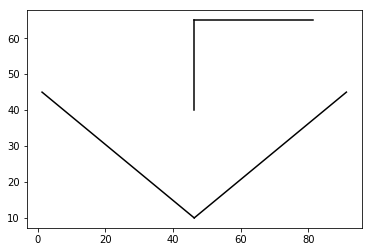

In [138]:
for temp in entities:
    if temp.dxftype == 'LWPOLYLINE':
        # print(temp.points)
        # LWPOLYLINE attributes: points, color, is_closed, thickness
        pts = temp.points
        x = [i[0] for i in pts]
        y = [i[1] for i in pts]
        plt.plot(x, y, 'k')
